In [ ]:
!pip install lazypredict

In [ ]:
import requests
import json
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_excel("australiantownslist.xlsx")
data = data[data['type'] == 'Rural locality']
data = data[data['population'] >= 50]
data = data[data['area_sq_km'] > 0]
# data = data[~data['name'].isin(['Norfolk Island','Christmas Island','Lord Howe Island'])]


data_pre = data.drop(['id', 'state_code', 'population', 'type','median_income','local_government_area','region', 'time_zone', 'urban_area'], axis=1)
# data = data.drop(['id', 'area_sq_km', 'local_government_area', 'region'], axis=1)
from sklearn.cluster import KMeans
k_processed_data = data_pre[['latitude','longitude']]


kmeans_clust = KMeans(n_clusters=10, init='k-means++', n_init=15, max_iter=300)
kmeans_clust.fit(k_processed_data)
k_processed_data['cluster'] = kmeans_clust.labels_
centers = kmeans_clust.cluster_centers_

C:\Users\gkthd\AppData\Local\Temp\ipykernel_21656\1916454822.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  k_processed_data['cluster'] = kmeans_clust.labels_


In [ ]:
centers

array([[-34.70152007, 138.89306524],
       [-31.57860799, 151.54843391],
       [-32.03440325, 116.74238979],
       [-27.47029726, 152.40001814],
       [-41.85035464, 146.8489382 ],
       [-17.84881616, 145.27127705],
       [-37.28695658, 144.75008456],
       [-17.41311206, 131.05473647],
       [-34.47220207, 149.11100462],
       [-23.04543102, 149.33521134]])

In [ ]:
centers = np.array([
    [152.40941867408, -27.5041962360992],
    [144.674135858748, -37.3189581380417],
    [116.742389794393, -32.0344032523365],
    [148.909899974392, -34.7496041613316],
    [145.268581263941, -17.8664544609665],
    [131.054736470588, -17.4131120588235],
    [146.84893820442, -41.850354640884],
    [138.885830898502, -34.6915680366057],
    [151.327661106613, -31.7759610391363],
    [149.368995594406, -23.0809256293706]
])
centers = centers[:, [1, 0]]
centers

array([[-27.50419624, 152.40941867],
       [-37.31895814, 144.67413586],
       [-32.03440325, 116.74238979],
       [-34.74960416, 148.90989997],
       [-17.86645446, 145.26858126],
       [-17.41311206, 131.05473647],
       [-41.85035464, 146.8489382 ],
       [-34.69156804, 138.8858309 ],
       [-31.77596104, 151.32766111],
       [-23.08092563, 149.36899559]])

In [ ]:
BASE_URL = 'https://power.larc.nasa.gov/api/temporal/monthly/point'

start = '2000' # change if needed
end = '2022' # Change if needed
latitudes  = []
longitudes = []

def twoListData(centers):
    for i in range(len(centers)):
        latitudes.append(centers[i][0])
        longitudes.append(centers[i][1])

twoListData(centers)

community = 're' # Change if needed

parameters = ['ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN','ALLSKY_KT', 'WS50M'] # Parameter List -> https://power.larc.nasa.gov/#resources
parameter_string = ','.join(parameters)

[-27.5041962360992, -37.3189581380417, -32.0344032523365, -34.7496041613316, -17.8664544609665, -17.4131120588235, -41.850354640884, -34.6915680366057, -31.7759610391363, -23.0809256293706]


In [ ]:
latitude = []
longitude = []
cluster = []
parameter_name = []
parameter_value = []
datetime = []

In [ ]:
for i in range(len(latitudes)):
        response = requests.get(BASE_URL + '?' +
                     'latitude=' + str(latitudes[i]) + '&' +
                     'longitude=' + str(longitudes[i]) + '&' +
                     'start=' + start + '&' +
                     'end=' + end + '&' +
                     'community=' + community + '&' +
                     'parameters='+ parameter_string + '&' +
                     'format=json&'
                     ).text
        response = json.loads(response)
        print(response)

        parameters = response['properties']['parameter']
        for param_name, values in parameters.items():
            for year_month_str, value in values.items():
                if year_month_str[4:6] != '13':
                    longitude.append(response['geometry']['coordinates'][0])
                    latitude.append(response['geometry']['coordinates'][1])
                    cluster.append(i)

                    parameter_name.append(param_name)
                    parameter_value.append(value)
                    datetime.append(year_month_str)

{'type': 'Feature', 'geometry': {'type': 'Point', 'coordinates': [152.40941867408, -27.5041962360992, 228.83]}, 'properties': {'parameter': {'WS50M': {'200001': 4.23, '200002': 5.27, '200003': 3.66, '200004': 4.38, '200005': 4.5, '200006': 4.17, '200007': 3.57, '200008': 4.36, '200009': 3.9, '200010': 4.2, '200011': 3.95, '200012': 3.7, '200013': 4.16, '200101': 4.12, '200102': 4.2, '200103': 4.23, '200104': 3.8, '200105': 3.45, '200106': 3.45, '200107': 3.55, '200108': 4.16, '200109': 4.0, '200110': 4.01, '200111': 3.98, '200112': 3.89, '200113': 3.9, '200201': 4.41, '200202': 3.87, '200203': 4.22, '200204': 4.02, '200205': 3.87, '200206': 4.23, '200207': 3.59, '200208': 4.15, '200209': 4.12, '200210': 4.28, '200211': 3.67, '200212': 4.16, '200213': 4.05, '200301': 4.26, '200302': 4.52, '200303': 3.53, '200304': 3.86, '200305': 4.15, '200306': 3.78, '200307': 3.66, '200308': 3.88, '200309': 4.41, '200310': 3.73, '200311': 4.13, '200312': 3.82, '200313': 3.98, '200401': 4.09, '200402':

In [ ]:
df = pd.DataFrame({
    'latitude': latitude,
    'longitude': longitude,
    'parameter': parameter_name,
    'value': parameter_value,
    'cluster': cluster,
    'datetime': datetime
})
df.head()

,latitude,longitude,parameter,value,cluster,datetime
0,-27.504196,152.409419,WS50M,4.23,0,200001
1,-27.504196,152.409419,WS50M,5.27,0,200002
2,-27.504196,152.409419,WS50M,3.66,0,200003
3,-27.504196,152.409419,WS50M,4.38,0,200004
4,-27.504196,152.409419,WS50M,4.50,0,200005


In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y%m')
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

In [ ]:
df_pivot = df.pivot_table(
    index=['latitude', 'longitude', 'datetime', 'year', 'month', 'cluster'],
    columns='parameter',
    values='value'
).reset_index()

print(df_pivot)

parameter   latitude   longitude   datetime  year  month  cluster  ALLSKY_KT  \
0         -41.850355  146.848938 2000-01-01  2000      1        6       0.55   
1         -41.850355  146.848938 2000-02-01  2000      2        6       0.59   
2         -41.850355  146.848938 2000-03-01  2000      3        6       0.55   
3         -41.850355  146.848938 2000-04-01  2000      4        6       0.55   
4         -41.850355  146.848938 2000-05-01  2000      5        6       0.44   
...              ...         ...        ...   ...    ...      ...        ...   
2755      -17.413112  131.054736 2022-08-01  2022      8        5       0.73   
2756      -17.413112  131.054736 2022-09-01  2022      9        5       0.69   
2757      -17.413112  131.054736 2022-10-01  2022     10        5       0.64   
2758      -17.413112  131.054736 2022-11-01  2022     11        5       0.62   
2759      -17.413112  131.054736 2022-12-01  2022     12        5       0.56   

parameter  ALLSKY_SFC_SW_DWN  CLRSKY_SF

In [ ]:
df_pivot = df_pivot.sort_values(by=['cluster', 'year', 'month'])
df_pivot

parameter,latitude,longitude,datetime,year,month,cluster,ALLSKY_KT,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,WS50M
1656,-27.504196,152.409419,2000-01-01,2000,1,0,0.55,6.55,8.47,4.23
1657,-27.504196,152.409419,2000-02-01,2000,2,0,0.51,5.56,7.91,5.27
1658,-27.504196,152.409419,2000-03-01,2000,3,0,0.53,5.02,6.70,3.66
1659,-27.504196,152.409419,2000-04-01,2000,4,0,0.49,3.81,5.48,4.38
1660,-27.504196,152.409419,2000-05-01,2000,5,0,0.55,3.43,4.43,4.50
...,...,...,...,...,...,...,...,...,...,...
2203,-23.080926,149.368996,2022-08-01,2022,8,9,0.62,4.77,5.62,5.56
2204,-23.080926,149.368996,2022-09-01,2022,9,9,0.59,5.39,6.75,5.20
2205,-23.080926,149.368996,2022-10-01,2022,10,9,0.58,6.07,7.67,5.59
2206,-23.080926,149.368996,2022-11-01,2022,11,9,0.60,6.85,8.46,5.88


In [ ]:
df_pivot

parameter,latitude,longitude,datetime,year,month,cluster,ALLSKY_KT,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,WS50M
1656,-27.504196,152.409419,2000-01-01,2000,1,0,0.55,6.55,8.47,4.23
1657,-27.504196,152.409419,2000-02-01,2000,2,0,0.51,5.56,7.91,5.27
1658,-27.504196,152.409419,2000-03-01,2000,3,0,0.53,5.02,6.70,3.66
1659,-27.504196,152.409419,2000-04-01,2000,4,0,0.49,3.81,5.48,4.38
1660,-27.504196,152.409419,2000-05-01,2000,5,0,0.55,3.43,4.43,4.50
...,...,...,...,...,...,...,...,...,...,...
2203,-23.080926,149.368996,2022-08-01,2022,8,9,0.62,4.77,5.62,5.56
2204,-23.080926,149.368996,2022-09-01,2022,9,9,0.59,5.39,6.75,5.20
2205,-23.080926,149.368996,2022-10-01,2022,10,9,0.58,6.07,7.67,5.59
2206,-23.080926,149.368996,2022-11-01,2022,11,9,0.60,6.85,8.46,5.88


In [ ]:
df_pivot.columns

Index(['latitude', 'longitude', 'datetime', 'year', 'month', 'cluster',
       'ALLSKY_KT', 'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN', 'WS50M'],
      dtype='object', name='parameter')

In [ ]:
# df_pivot.to_csv('dataset.csv') # open excel and delete the first column

In [ ]:
# df = pd.read_csv('dataset.csv')
# df.head()
df = df_pivot

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2760 entries, 1656 to 2207
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   latitude           2760 non-null   float64       
 1   longitude          2760 non-null   float64       
 2   datetime           2760 non-null   datetime64[ns]
 3   year               2760 non-null   int32         
 4   month              2760 non-null   int32         
 5   cluster            2760 non-null   int64         
 6   ALLSKY_KT          2760 non-null   float64       
 7   ALLSKY_SFC_SW_DWN  2760 non-null   float64       
 8   CLRSKY_SFC_SW_DWN  2760 non-null   float64       
 9   WS50M              2760 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int32(2), int64(1)
memory usage: 215.6 KB


In [ ]:
df['ALLSKY_SFC_SW_DWN_shifted'] = df.groupby(['latitude', 'longitude'])['ALLSKY_SFC_SW_DWN'].shift(1)
df['datetime'] = pd.to_datetime(df['datetime'])

df.loc[df.groupby(['latitude', 'longitude'])['datetime'].idxmax(), 'ALLSKY_SFC_SW_DWN_shifted'] = pd.NA
df_cleaned = df.dropna(subset=['ALLSKY_SFC_SW_DWN_shifted'])



In [ ]:
df_cleaned.head(277)

parameter,latitude,longitude,datetime,year,month,cluster,ALLSKY_KT,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,WS50M,ALLSKY_SFC_SW_DWN_shifted
1657,-27.504196,152.409419,2000-02-01,2000,2,0,0.51,5.56,7.91,5.27,6.55
1658,-27.504196,152.409419,2000-03-01,2000,3,0,0.53,5.02,6.70,3.66,5.56
1659,-27.504196,152.409419,2000-04-01,2000,4,0,0.49,3.81,5.48,4.38,5.02
1660,-27.504196,152.409419,2000-05-01,2000,5,0,0.55,3.43,4.43,4.50,3.81
1661,-27.504196,152.409419,2000-06-01,2000,6,0,0.56,3.15,3.95,4.17,3.43
...,...,...,...,...,...,...,...,...,...,...,...
1929,-27.504196,152.409419,2022-10-01,2022,10,0,0.48,4.97,7.60,4.33,4.87
1930,-27.504196,152.409419,2022-11-01,2022,11,0,0.60,6.90,8.67,4.48,4.97
277,-37.318958,144.674136,2000-02-01,2000,2,1,0.59,6.26,7.85,6.57,6.71
278,-37.318958,144.674136,2000-03-01,2000,3,1,0.58,4.94,6.21,6.20,6.26


In [ ]:
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
X = df_cleaned.drop(['datetime', 'cluster', 'CLRSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_SW_DWN_shifted', 'WS50M','ALLSKY_KT'], axis=1)
Y = df_cleaned['ALLSKY_SFC_SW_DWN_shifted']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(2192, 4)
(2192,)
(548, 4)
(548,)


In [ ]:
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

 67%|██████████████████████████████████████████████████████▋                           | 28/42 [00:02<00:01, 10.23it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:03<00:00, 11.74it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 2192, number of used features: 4
[LightGBM] [Info] Start training from score 5.131492
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
HistGradientBoostingRegressor                0.95       0.95  0.37        0.22
LGBMRegressor                                0.95       0.95  0.37        0.04
XGBRegressor                                 0.95       0.95  0.39        0.06
GradientBoostingRegressor                    0.94       0.94  0.41        0.10
RandomForestRegressor                        0.94       0.94  0.41        0.64
BaggingRegressor                             

In [ ]:
predictions.head(5)

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.95,0.95,0.37,0.22
LGBMRegressor,0.95,0.95,0.37,0.04
XGBRegressor,0.95,0.95,0.39,0.06
GradientBoostingRegressor,0.94,0.94,0.41,0.10
RandomForestRegressor,0.94,0.94,0.41,0.64


In [ ]:
def get_metrics_value(model):
    predictions_train = model.predict(X_train)
    predictions_test = model.predict(X_test)

    mae_train = mean_absolute_error(y_train, predictions_train)
    mse_train = mean_squared_error(y_train, predictions_train)
    rmse_train = np.sqrt(mse_train)
    msle_train = mean_squared_log_error(y_train, predictions_train)
    rmsle_train = np.sqrt(msle_train)
    r2_score_train = r2_score(y_train, predictions_train)

    mae_test = mean_absolute_error(y_test, predictions_test)
    mse_test = mean_squared_error(y_test, predictions_test)
    rmse_test = np.sqrt(mse_test)
    msle_test = mean_squared_log_error(y_test, predictions_test)
    rmsle_test = np.sqrt(msle_test)
    r2_score_test = r2_score(y_test, predictions_test)

    print("Train dataset performance metrics:")
    print(f"MAE (Mean Absolute Error): {mae_train:.4f}")
    print(f"MSE (Mean Squared Error): {mse_train:.4f}")
    print(f"RMSE (Root Mean Squared Error): {rmse_train:.4f}")
    print(f"MSLE (Mean Squared Log Error): {msle_train:.4f}")
    print(f"RMSLE (Root Mean Squared Log Error): {rmsle_train:.4f}")
    print(f"R^2 Score: {r2_score_train:.4f}")
    print("")

    print("Test dataset performance metrics:")
    print(f"MAE (Mean Absolute Error): {mae_test:.4f}")
    print(f"MSE (Mean Squared Error): {mse_test:.4f}")
    print(f"RMSE (Root Mean Squared Error): {rmse_test:.4f}")
    print(f"MSLE (Mean Squared Log Error): {msle_test:.4f}")
    print(f"RMSLE (Root Mean Squared Log Error): {rmsle_test:.4f}")
    print(f"R^2 Score: {r2_score_test:.4f}")

    print("")
    mae_diff = mae_train - mae_test
    mse_diff = mse_train - mse_test
    rmse_diff = rmse_train - rmse_test
    msle_diff = msle_train - msle_test
    rmsle_diff = rmsle_train - rmsle_test
    r2_diff = r2_score_train - r2_score_test

    print("Differences between Train and Test dataset performance metrics:")
    print(f"MAE Difference: {mae_diff:.4f}")
    print(f"MSE Difference: {mse_diff:.4f}")
    print(f"RMSE Difference: {rmse_diff:.4f}")
    print(f"MSLE Difference: {msle_diff:.4f}")
    print(f"RMSLE Difference: {rmsle_diff:.4f}")
    print(f"R^2 Score Difference: {r2_diff:.4f}")

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

def get_cross_val_score(model):
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, Y, scoring='neg_mean_squared_error', cv=kf)

    mse_scores = -scores
    print("Mean Squared Error per fold: ", mse_scores)
    print("Average Mean Squared Error: ", np.mean(mse_scores))

In [ ]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score


regressor = HistGradientBoostingRegressor()

regressor.fit(X_train, y_train)
print(get_metrics_value(regressor))
print(get_cross_val_score(regressor))


Train dataset performance metrics:
MAE (Mean Absolute Error): 0.2171
MSE (Mean Squared Error): 0.0814
RMSE (Root Mean Squared Error): 0.2853
MSLE (Mean Squared Log Error): 0.0021
RMSLE (Root Mean Squared Log Error): 0.0458
R^2 Score: 0.9718

Test dataset performance metrics:
MAE (Mean Absolute Error): 0.2844
MSE (Mean Squared Error): 0.1346
RMSE (Root Mean Squared Error): 0.3669
MSLE (Mean Squared Log Error): 0.0033
RMSLE (Root Mean Squared Log Error): 0.0578
R^2 Score: 0.9545

Differences between Train and Test dataset performance metrics:
MAE Difference: -0.0673
MSE Difference: -0.0532
RMSE Difference: -0.0816
MSLE Difference: -0.0013
RMSLE Difference: -0.0121
R^2 Score Difference: 0.0173
None
Mean Squared Error per fold:  [0.12207228 0.13713323 0.12620219 0.12639744 0.1254219 ]
Average Mean Squared Error:  0.12744540936869467
None


In [ ]:
predictions_train = regressor.predict(X_train)
predictions_test = regressor.predict(X_test)

result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':predictions_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result

,Real Values,Predicted Values,diff
2460,6.23,6.47,-0.24
614,6.59,6.87,-0.28
2282,6.43,5.60,0.83
2140,5.76,5.12,0.64
129,3.75,3.59,0.16
...,...,...,...
2253,6.63,6.09,0.54
409,6.81,6.99,-0.18
1646,5.47,5.82,-0.35
2419,4.15,4.25,-0.10


In [ ]:
result.sort_values(by=['diff'], ascending = False)

,Real Values,Predicted Values,diff
1583,7.77,6.79,0.98
2328,6.86,5.88,0.98
746,7.61,6.77,0.84
2282,6.43,5.60,0.83
2209,6.77,5.94,0.83
...,...,...,...
1632,5.85,6.97,-1.12
2063,4.90,6.06,-1.16
2654,5.59,6.84,-1.25
1934,4.76,6.06,-1.30


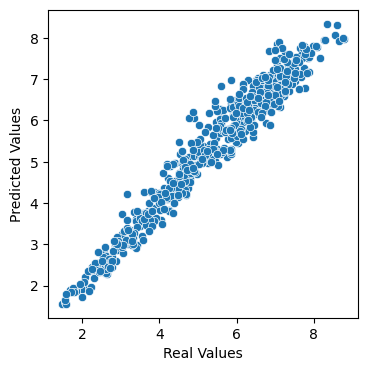

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=result['Real Values'], y=result['Predicted Values'])
plt.gcf().set_size_inches(4 ,4)

In [ ]:
# HistGradientBoostingRegressor does not support feature importance

# ftr_importances_values = regressor.feature_importances_
# ftr_importances = pd.Series(ftr_importances_values, index=x_train.columns)
# ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

# plt.figure(figsize=(8,6))
# plt.title('Feature Importances')
# sns.barplot(x=ftr_top20, y=ftr_top20.index)
# plt.show()

In [ ]:
# Hyperparameter tuninig
from sklearn.model_selection import GridSearchCV
# Hyperparameter: learning_rate, max_iter, max_depth, min_samples_leaf

param = {
    'learning_rate': [0.1, 0.01, 0.001, 0.05, 0.2],
    'max_iter': [20, 30, 50, 100, 200, 300],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
    'min_samples_leaf': [5, 10, 15, 20, 25, 30]
}
tuned_reg = HistGradientBoostingRegressor(random_state=123456)
grid_search_hrbr = GridSearchCV(tuned_reg, param_grid=param, cv=3)
grid_search_hrbr.fit(X_train, y_train)
print("Best parameters: ", grid_search_hrbr.best_params_)
print("Best score: ", grid_search_hrbr.best_score_) # r2 score

Best parameters:  {'learning_rate': 0.05, 'max_depth': 10, 'max_iter': 200, 'min_samples_leaf': 5}
Best score:  0.9562005917208979


In [ ]:
print(get_metrics_value(grid_search_hrbr))


Train dataset performance metrics:
MAE (Mean Absolute Error): 0.2002
MSE (Mean Squared Error): 0.0681
RMSE (Root Mean Squared Error): 0.2610
MSLE (Mean Squared Log Error): 0.0018
RMSLE (Root Mean Squared Log Error): 0.0423
R^2 Score: 0.9764

Test dataset performance metrics:
MAE (Mean Absolute Error): 0.2773
MSE (Mean Squared Error): 0.1286
RMSE (Root Mean Squared Error): 0.3586
MSLE (Mean Squared Log Error): 0.0032
RMSLE (Root Mean Squared Log Error): 0.0569
R^2 Score: 0.9565

Differences between Train and Test dataset performance metrics:
MAE Difference: -0.0770
MSE Difference: -0.0605
RMSE Difference: -0.0976
MSLE Difference: -0.0014
RMSLE Difference: -0.0145
R^2 Score Difference: 0.0199
None


In [ ]:
predictions_train = grid_search_hrbr.predict(X_train)
predictions_test = grid_search_hrbr.predict(X_test)

result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':predictions_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result

,Real Values,Predicted Values,diff
2460,6.23,6.44,-0.21
614,6.59,6.81,-0.22
2282,6.43,5.78,0.65
2140,5.76,5.14,0.62
129,3.75,3.57,0.18
...,...,...,...
2253,6.63,5.98,0.65
409,6.81,6.97,-0.16
1646,5.47,5.83,-0.36
2419,4.15,4.27,-0.12


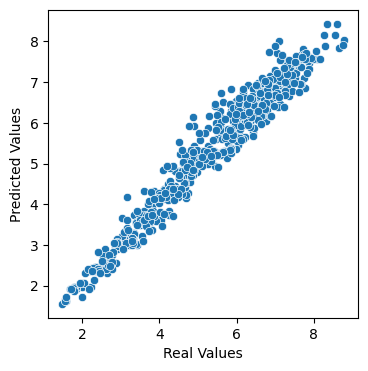

In [ ]:
sns.scatterplot(x=result['Real Values'], y=result['Predicted Values'])
plt.gcf().set_size_inches(4 ,4)

In [ ]:
import lightgbm as lgb
regressor = lgb.LGBMRegressor()

regressor.fit(X_train, y_train)
print(get_metrics_value(regressor))
print(get_cross_val_score(regressor))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 2192, number of used features: 4
[LightGBM] [Info] Start training from score 5.131492
Train dataset performance metrics:
MAE (Mean Absolute Error): 0.2171
MSE (Mean Squared Error): 0.0814
RMSE (Root Mean Squared Error): 0.2853
MSLE (Mean Squared Log Error): 0.0021
RMSLE (Root Mean Squared Log Error): 0.0458
R^2 Score: 0.9718

Test dataset performance metrics:
MAE (Mean Absolute Error): 0.2844
MSE (Mean Squared Error): 0.1346
RMSE (Root Mean Squared Error): 0.3669
MSLE (Mean Squared Log Error): 0.0033
RMSLE (Root Mean Squared Log Error): 0.0578
R^2 Score: 0.9545

Differences between Train and Test dataset performance metrics:
MAE Difference: -0.0673
MSE Difference: -0.0532
RMS

In [ ]:
predictions_train = regressor.predict(X_train)
predictions_test = regressor.predict(X_test)

result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':predictions_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result

,Real Values,Predicted Values,diff
2460,6.23,6.47,-0.24
614,6.59,6.87,-0.28
2282,6.43,5.60,0.83
2140,5.76,5.12,0.64
129,3.75,3.59,0.16
...,...,...,...
2253,6.63,6.09,0.54
409,6.81,6.99,-0.18
1646,5.47,5.82,-0.35
2419,4.15,4.25,-0.10


In [ ]:
result.sort_values(by=['diff'], ascending = False)

,Real Values,Predicted Values,diff
1583,7.77,6.79,0.98
2328,6.86,5.88,0.98
746,7.61,6.77,0.84
2282,6.43,5.60,0.83
2209,6.77,5.94,0.83
...,...,...,...
1632,5.85,6.97,-1.12
2063,4.90,6.06,-1.16
2654,5.59,6.84,-1.25
1934,4.76,6.06,-1.30


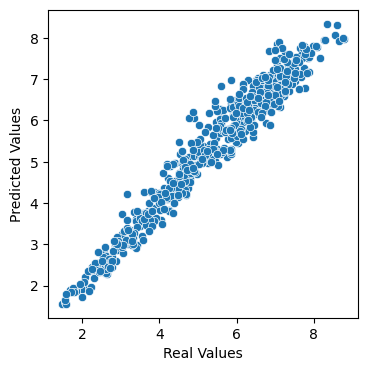

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x=result['Real Values'], y=result['Predicted Values'])
plt.gcf().set_size_inches(4 ,4)

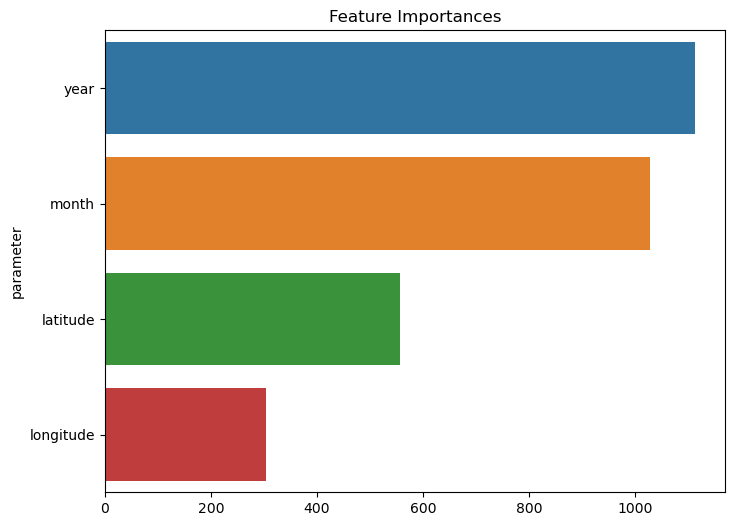

In [ ]:
ftr_importances_values = regressor.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [ ]:
param = {
    'learning_rate': [0.1, 0.01, 0.001, 0.05, 0.2],
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16]
}
tuned_reg = lgb.LGBMRegressor(random_state=123456)
grid_search = GridSearchCV(tuned_reg, param_grid=param, cv=3)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_) # r2 score

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000021 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.144162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.111212
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000037 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.111212
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000040 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.144162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000011 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.144162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.111212
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000020 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.144162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you c

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.111212
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.111212
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.111212
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.111212
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.144162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you c

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.111212
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.144162
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.111212
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.111212
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.111212
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.144162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[L

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.144162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.144162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.144162
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000039 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000016 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.111212
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.111212
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.144162
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.111212
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the over

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000063 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.144162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.111212
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.111212
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leav

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.144162
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000015 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1461, number of used features: 4
[LightGBM] [Info] Start training from score 5.144162
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000017 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 59
[LightGBM] [Info] Number of data points in the train set: 1462, number of used features: 4
[LightGBM] [Info] Start training from score 5.139097
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_l

In [ ]:
print(get_metrics_value(grid_search))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Train dataset performance metrics:
MAE (Mean Absolute Error): 0.1940
MSE (Mean Squared Error): 0.0640
RMSE (Root Mean Squared Error): 0.2530
MSLE (Mean Squared Log Error): 0.0017
RMSLE (Root Mean Squared Log Error): 0.0413
R^2 Score: 0.9778

Test dataset performance metrics:
MAE (Mean Absolute Error): 0.2814
MSE (Mean Squared Error): 0.1356
RMSE (Root Mean Squared Error): 0.3682
MSLE (Mean Squared Log Error): 0.0034
RMSLE (Root Mean Squared Log Error): 0.0580
R^2 Score: 0.9542

Differences between Train and Test dataset performance metrics:
MAE Difference: -0.0874
MSE Difference: -0.0716
RMSE Difference: -0.1152
MSLE Difference: -0.0017
RMSLE Difference: -0.0168
R^2 Score Difference: 0.0237
None


In [ ]:
predictions_train = grid_search.predict(X_train)
predictions_test = grid_search.predict(X_test)

result = pd.DataFrame({'Real Values':y_test, 'Predicted Values':predictions_test})
result['diff'] = result['Real Values'] - result['Predicted Values']
result

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,Real Values,Predicted Values,diff
2460,6.23,6.28,-0.05
614,6.59,7.13,-0.54
2282,6.43,5.49,0.94
2140,5.76,5.12,0.64
129,3.75,3.51,0.24
...,...,...,...
2253,6.63,6.05,0.58
409,6.81,7.03,-0.22
1646,5.47,5.71,-0.24
2419,4.15,4.34,-0.19


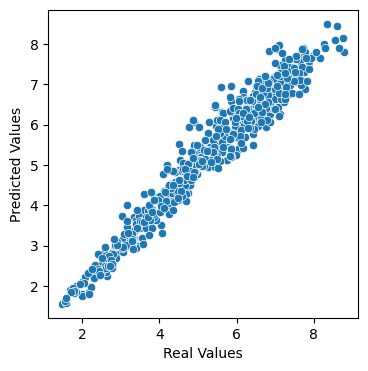

In [ ]:
sns.scatterplot(x=result['Real Values'], y=result['Predicted Values'])
plt.gcf().set_size_inches(4 ,4)

In [ ]:
# latitude, longitude, year, month
# 10            10      2024 1

In [ ]:
df = pd.DataFrame(centers, columns=['latitude', 'longitude'])
df['year'] = 2025
df = pd.concat([df]*12, ignore_index=True).sort_values(by=['latitude', 'longitude'])
df['month'] = list(range(1, 13)) * len(centers)
print(df.head(20))


     latitude  longitude  year  month
6      -41.85     146.85  2025      1
16     -41.85     146.85  2025      2
26     -41.85     146.85  2025      3
36     -41.85     146.85  2025      4
46     -41.85     146.85  2025      5
56     -41.85     146.85  2025      6
66     -41.85     146.85  2025      7
76     -41.85     146.85  2025      8
86     -41.85     146.85  2025      9
96     -41.85     146.85  2025     10
106    -41.85     146.85  2025     11
116    -41.85     146.85  2025     12
1      -37.32     144.67  2025      1
11     -37.32     144.67  2025      2
21     -37.32     144.67  2025      3
31     -37.32     144.67  2025      4
41     -37.32     144.67  2025      5
51     -37.32     144.67  2025      6
61     -37.32     144.67  2025      7
71     -37.32     144.67  2025      8


In [ ]:
df['predictedValue'] = grid_search.predict(df)
df

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,latitude,longitude,year,month,predictedValue
6,-41.85,146.85,2025,1,6.97
16,-41.85,146.85,2025,2,6.61
26,-41.85,146.85,2025,3,5.88
36,-41.85,146.85,2025,4,4.36
46,-41.85,146.85,2025,5,2.95
...,...,...,...,...,...
75,-17.41,131.05,2025,8,5.28
85,-17.41,131.05,2025,9,5.89
95,-17.41,131.05,2025,10,6.57
105,-17.41,131.05,2025,11,6.84


In [ ]:
average_predicted_values = df.groupby(['latitude', 'longitude']).predictedValue.mean().reset_index()
average_predicted_values

,latitude,longitude,predictedValue
0,-41.85,146.85,4.00
1,-37.32,144.67,4.37
2,-34.75,148.91,4.73
3,-34.69,138.89,5.01
4,-32.03,116.74,5.37
5,-31.78,151.33,4.65
6,-27.50,152.41,4.91
7,-23.08,149.37,5.48
8,-17.87,145.27,5.33
9,-17.41,131.05,6.24


In [ ]:
len(k_processed_data[k_processed_data['cluster'] == 9]['latitude'].unique())

284

In [ ]:
len(centers)

NameError: name 'centers' is not defined

In [ ]:

len(k_processed_data[k_processed_data['cluster'] == 9])

284

In [ ]:
len(k_processed_data)

284

In [ ]:
import pandas as pd

k_processed_data = k_processed_data[k_processed_data['cluster'] == 9]
k_processed_data['year'] = 2025

data_last = pd.concat([k_processed_data]*12, ignore_index=True)

data_last['month'] = (list(range(1, 13))) * len(k_processed_data[k_processed_data['cluster'] == 9])

print(data_last)


      latitude  longitude  cluster  year  month
0       -25.91     144.70        9  2025      1
1       -23.11     150.70        9  2025      2
2       -24.44     148.40        9  2025      3
3       -21.16     149.10        9  2025      4
4       -21.32     149.21        9  2025      5
...        ...        ...      ...   ...    ...
3403    -27.15     146.00        9  2025      8
3404    -23.13     150.37        9  2025      9
3405    -20.84     148.66        9  2025     10
3406    -23.84     151.13        9  2025     11
3407    -27.97     144.64        9  2025     12

[3408 rows x 5 columns]


In [ ]:
data_last['predictedValue'] = grid_search_hrbr.predict(data_last.drop(['cluster'], axis=1))
data_last

,latitude,longitude,cluster,year,month,predictedValue
0,-25.91,144.70,9,2025,1,7.03
1,-23.11,150.70,9,2025,2,6.53
2,-24.44,148.40,9,2025,3,6.51
3,-21.16,149.10,9,2025,4,5.89
4,-21.32,149.21,9,2025,5,4.83
...,...,...,...,...,...,...
3403,-27.15,146.00,9,2025,8,3.59
3404,-23.13,150.37,9,2025,9,4.72
3405,-20.84,148.66,9,2025,10,5.63
3406,-23.84,151.13,9,2025,11,6.06


In [ ]:
data_last['predictedValue'].min(), data_last['predictedValue'].max()

(3.171209214473289, 7.203642986697145)

In [ ]:
average_predicted_values_last = data_last.groupby(['latitude', 'longitude']).predictedValue.mean().reset_index()
average_predicted_values_last

,latitude,longitude,predictedValue
0,-28.14,145.01,4.87
1,-27.97,144.64,4.90
2,-27.15,146.00,4.87
3,-26.76,148.42,5.00
4,-26.67,143.27,5.24
...,...,...,...
279,-20.28,148.64,5.45
280,-20.28,148.58,5.45
281,-20.27,147.95,5.29
282,-20.25,148.98,5.29


In [ ]:
average_predicted_values_last[average_predicted_values_last['predictedValue'] == average_predicted_values_last['predictedValue'].max()]

,latitude,longitude,predictedValue
40,-24.75,150.29,5.58
43,-24.62,149.81,5.58
60,-24.36,150.32,5.58
89,-23.95,150.34,5.58
106,-23.70,150.00,5.58
113,-23.62,150.16,5.58
121,-23.49,150.33,5.58
131,-23.36,150.24,5.58
166,-23.08,150.28,5.58
189,-22.12,149.53,5.58


In [ ]:
top_predicted_values = average_predicted_values_last.nlargest(50, 'predictedValue')

unique_coordinates = top_predicted_values[['latitude', 'longitude']].drop_duplicates()

filtered_data = pd.merge(data, unique_coordinates, on=['latitude', 'longitude'], how='inner')

print(top10_predicted_values)
print(filtered_data)

     latitude  longitude  predictedValue
40     -24.75     150.29            5.62
43     -24.62     149.81            5.62
60     -24.36     150.32            5.62
89     -23.95     150.34            5.62
106    -23.70     150.00            5.62
113    -23.62     150.16            5.62
121    -23.49     150.33            5.62
131    -23.36     150.24            5.62
166    -23.08     150.28            5.62
189    -22.12     149.53            5.62
207    -21.32     149.21            5.62
28     -25.03     148.81            5.62
52     -24.46     148.62            5.62
115    -23.60     148.55            5.62
156    -23.16     147.98            5.62
172    -22.98     148.04            5.62
178    -22.64     148.92            5.62
179    -22.64     148.37            5.62
182    -22.48     147.92            5.62
198    -21.51     148.99            5.62
199    -21.49     148.42            5.62
203    -21.37     149.10            5.62
209    -21.31     148.83            5.62
210    -21.31   

In [ ]:
max_value_rows = average_predicted_values_last[average_predicted_values_last['predictedValue'] == average_predicted_values_last['predictedValue'].max()]

unique_coordinates = max_value_rows[['latitude', 'longitude']].drop_duplicates()

filtered_data = pd.merge(data, unique_coordinates, on=['latitude', 'longitude'], how='inner')
print(filtered_data)


       id             name urban_area state_code       state  postcode  \
0     154  Alligator Creek        NaN        QLD  Queensland      4740   
1    2404          Canoona        NaN        QLD  Queensland      4702   
2    2592     Castle Creek        NaN        QLD  Queensland      4715   
3    2829        Clairview        NaN        QLD  Queensland      4741   
4    3647            Dalma        NaN        QLD  Queensland      4702   
5    3920          Dixalea        NaN        QLD  Queensland      4702   
6    5400          Gogango        NaN        QLD  Queensland      4702   
7   10391     Orange Creek        NaN        QLD  Queensland      4715   
8   11642       Roundstone        NaN        QLD  Queensland      4718   
9   12390         Stanwell        NaN        QLD  Queensland      4702   
10  14412         Westwood        NaN        QLD  Queensland      4702   

              type  latitude  longitude  elevation  population  median_income  \
0   Rural locality    -21.32  